# Experiment 02: Influence of weight coefficients

In [1]:
%matplotlib inline

import os
import sys
import copy
import time
import pickle
from array import array
import numpy as np
np.seterr(over='ignore')
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy import optimize
from scipy.interpolate import RegularGridInterpolator
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from ipywidgets import interact, interactive, fixed, FloatSlider

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

# VarClump functions
sys.path.append('../lib/')
from utils import *
from graph import *
from points_generation import *
from initial_guess import *
from variational import *
from gmr import *

## Loading data 2D

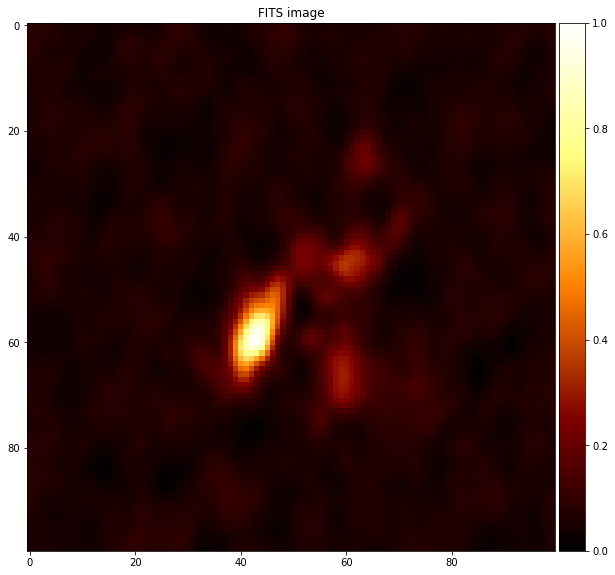

In [2]:
"""
Loading data
"""

fits_path = '../data/images/Orion.cont.image.fits'
x, y, data, dfunc = load_data(fits_path)
image_plot(data)

In [3]:
base_level = estimate_rms(data)
interact(thresholded_image_plot, data=fixed(data), level=FloatSlider(min=base_level,max=1.,step=0.01,value=base_level))

/Users/mavillan/anaconda3/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


<function graph.thresholded_image_plot>

## `Case 1 `:   $\alpha_1 \in [0,10]$

In [4]:
elm_list = list()
alpha1 = np.arange(0.,10.1,1.)

for a1 in alpha1:
    # common parameters
    minsig = ( 0.5*(1./data.shape[0] + 1./data.shape[1]) ) / 6.
    maxsig = 30*minsig

    # number of points of each type
    Nb = int(0.2* np.sum(boundary_map(data, base_level))) #20% of boundary pixels
    Nc = 200
    Ne = 4*Nc-Nb

    # points generation
    center_points = random_centers_generation(data, Nc, base_level=base_level, power=2.)
    collocation_points = qrandom_centers_generation(dfunc, Ne, base_level, ndim=2)
    boundary_points = boundary_generation(Nb)

    # right format
    xc = center_points[:,0]
    yc = center_points[:,1]
    xe = collocation_points[:,0]
    ye = collocation_points[:,1]
    xb = boundary_points[:,0]
    yb = boundary_points[:,1]

    ## visualizing the choosen points
    #points_plot(data, center_points=center_points, title="Center Points")
    #points_plot(data, center_points=collocation_points, title="Collocation Points")


    ####################################
    # Initial parameters estimation
    ####################################
    c0, sig0 = estimate_initial_guess(center_points, dfunc, minsig=minsig, maxsig=maxsig, method='min_dist')


    #solution_plot(dfunc, c0, sig0, xc, yc, dims=data.shape, base_level=base_level)
    #params_plot(c0, sig0, xc, yc)
    #params_distribution_plot(c0, sig0)
    elm_list.append( ELModel(data, dfunc, data.shape, xe, ye, xc, yc, xb, yb, c0, sig0, a=a1, lamb1=1., b=0., lamb2=1.,
                    d1psi1=d1psi, d1psi2=d1psi, d2psi2=d2psi, base_level=base_level, pix_freedom=1.) )

##########################################################################################
Processing example with alpha1: 0.0
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 80100.
nfev: 80113

Residual stats:
Residual RMS: 0.005595146191492522
Residual Variance: 3.113799001837025e-05
Residual Entropy: 6.557736626091309
Added Flux: 1.5631349011205238
Total elapsed time: 210.99660181999207 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.03934196517494353
Mean min distance between collocation and center points: 0.010653422021018752

Homogeneity of solution:
Mean min distance in the (standarized) parameters space

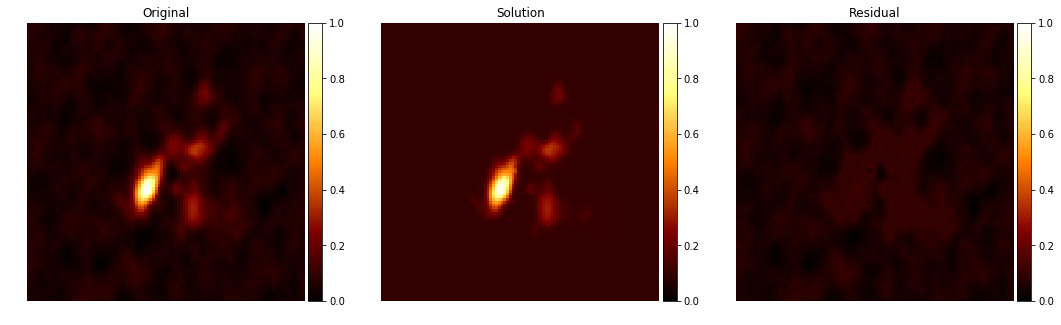

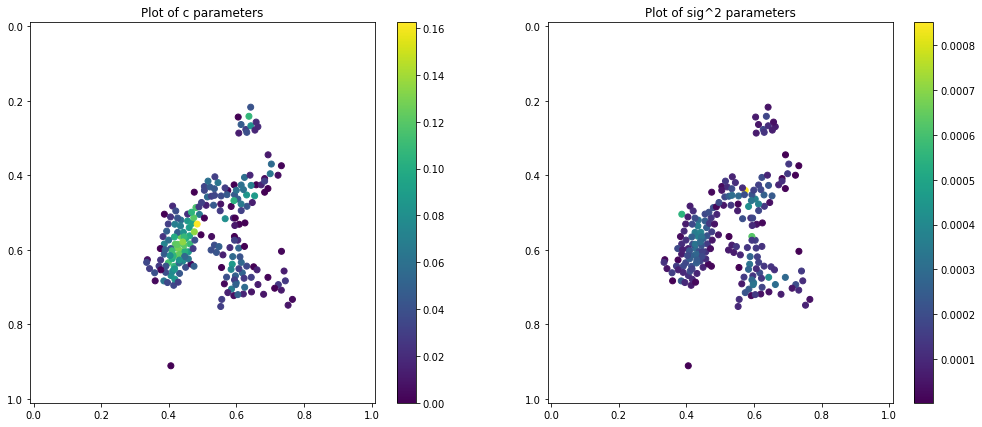

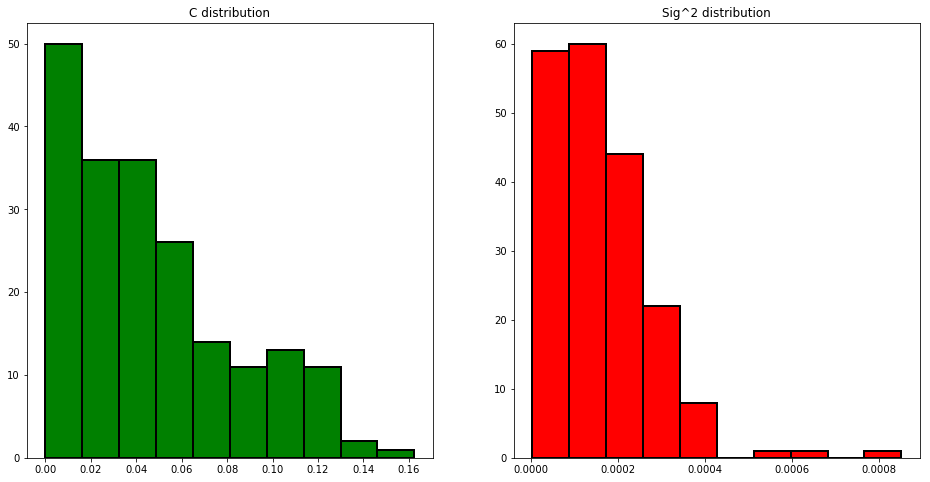

##########################################################################################
Processing example with alpha1: 1.0
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 80100.
nfev: 80115

Residual stats:
Residual RMS: 0.005307128629317764
Residual Variance: 2.7880860078201805e-05
Residual Entropy: 6.5744580579439695
Added Flux: 1.4604571467863443
Total elapsed time: 205.54602694511414 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.031475434267233905
Mean min distance between collocation and center points: 0.010496188475996334

Homogeneity of solution:
Mean min distance in the (standarized) parameters sp

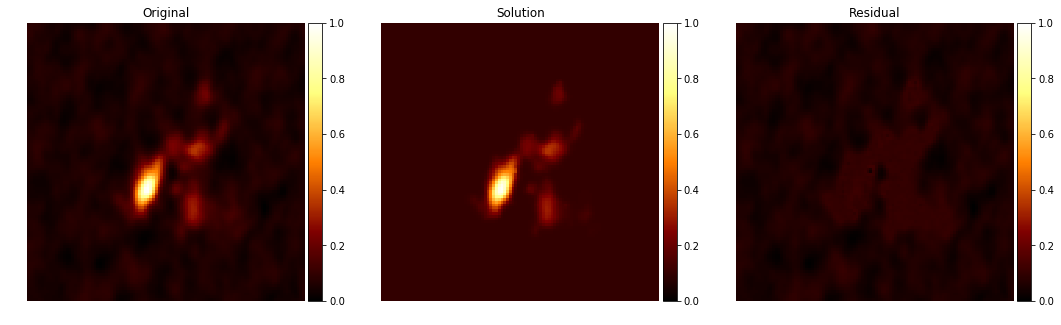

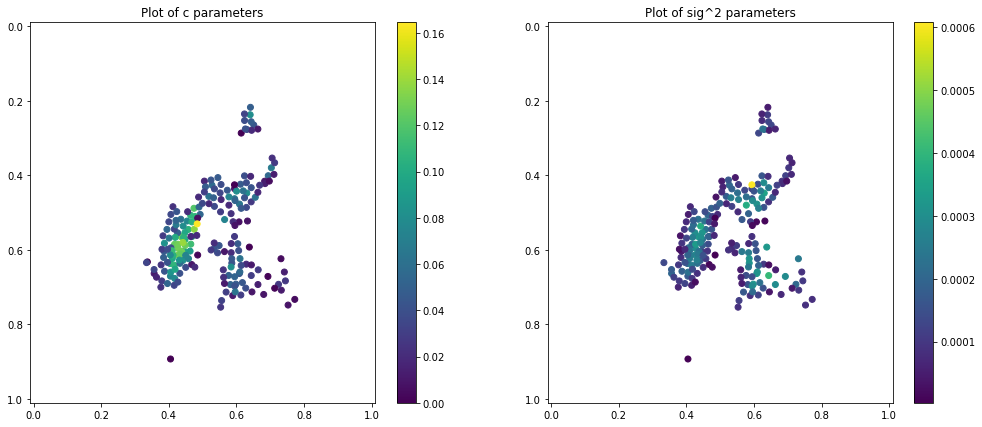

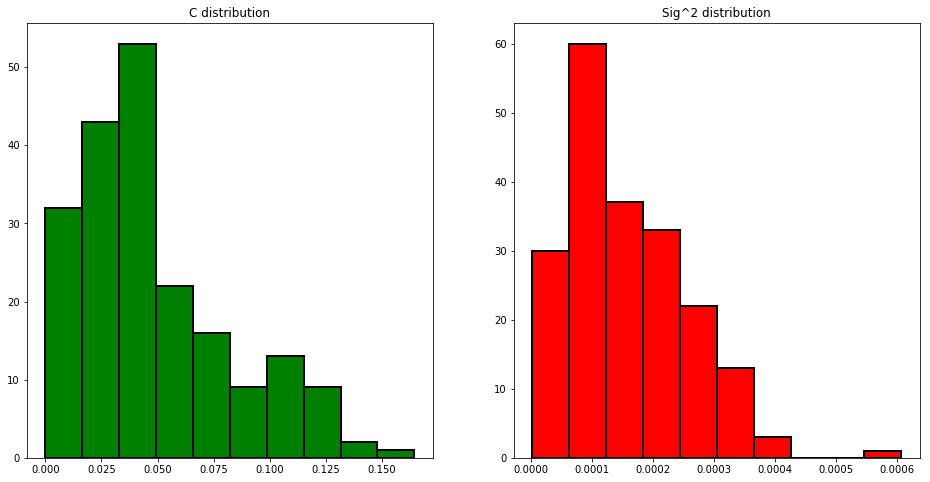

##########################################################################################
Processing example with alpha1: 2.0
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 80100.
nfev: 80113

Residual stats:
Residual RMS: 0.00515110986180161
Residual Variance: 2.6236598646267863e-05
Residual Entropy: 6.645390524285046
Added Flux: 1.4358796477042606
Total elapsed time: 200.03512406349182 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.03139110477080714
Mean min distance between collocation and center points: 0.010420404392222459

Homogeneity of solution:
Mean min distance in the (standarized) parameters space

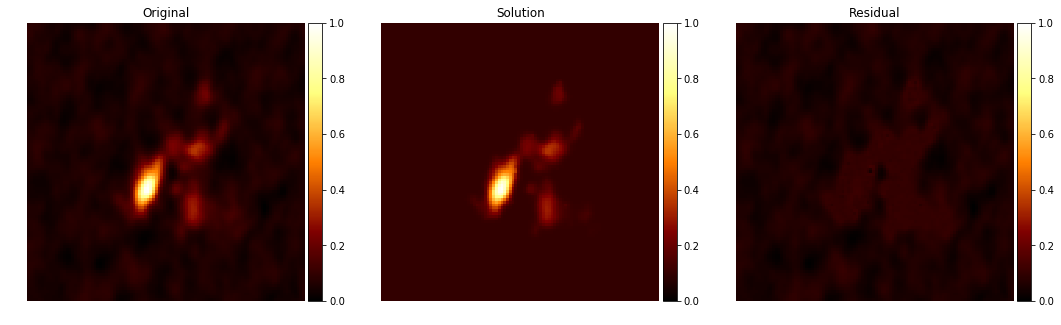

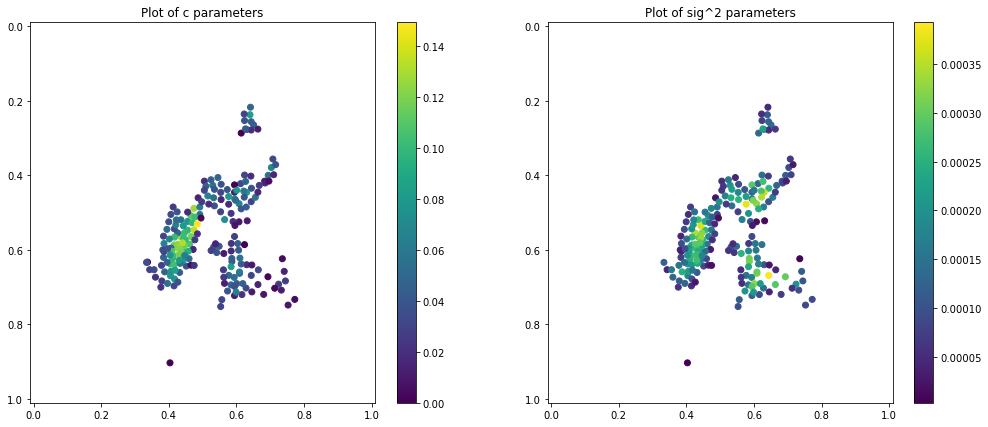

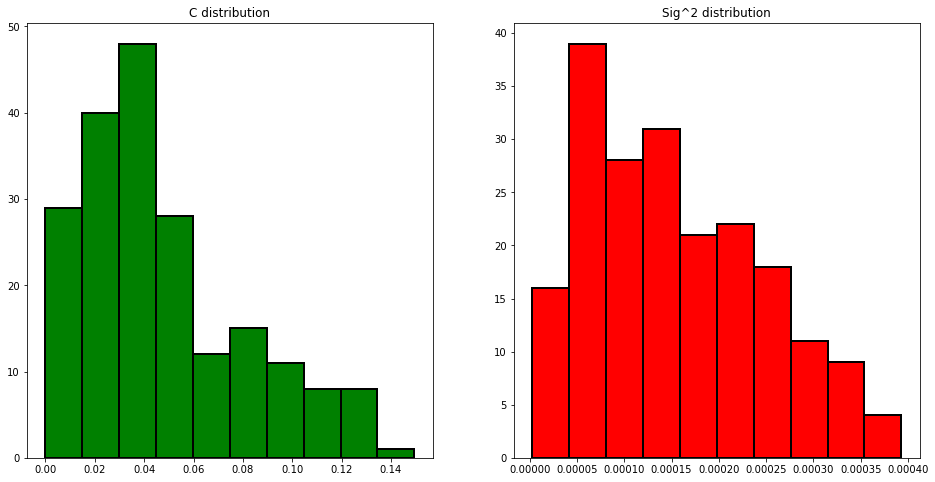

##########################################################################################
Processing example with alpha1: 3.0
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 80100.
nfev: 80118

Residual stats:
Residual RMS: 0.00520728929076201
Residual Variance: 2.6667828954013465e-05
Residual Entropy: 6.661868877151913
Added Flux: 1.3853245358934003
Total elapsed time: 202.4652988910675 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.030750861486091737
Mean min distance between collocation and center points: 0.010527526601342973

Homogeneity of solution:
Mean min distance in the (standarized) parameters space

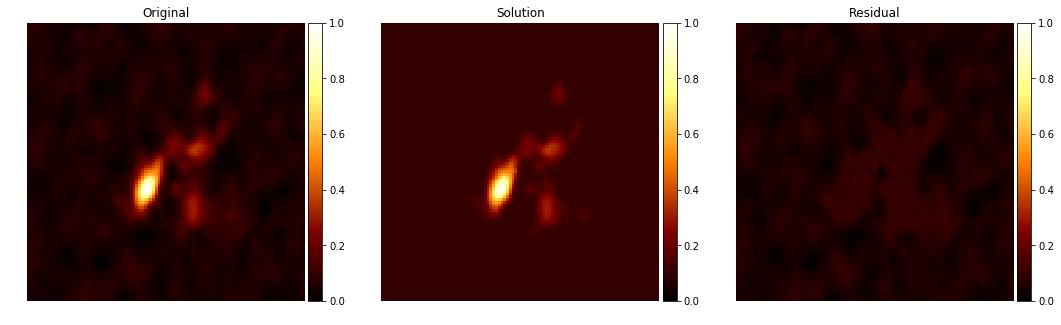

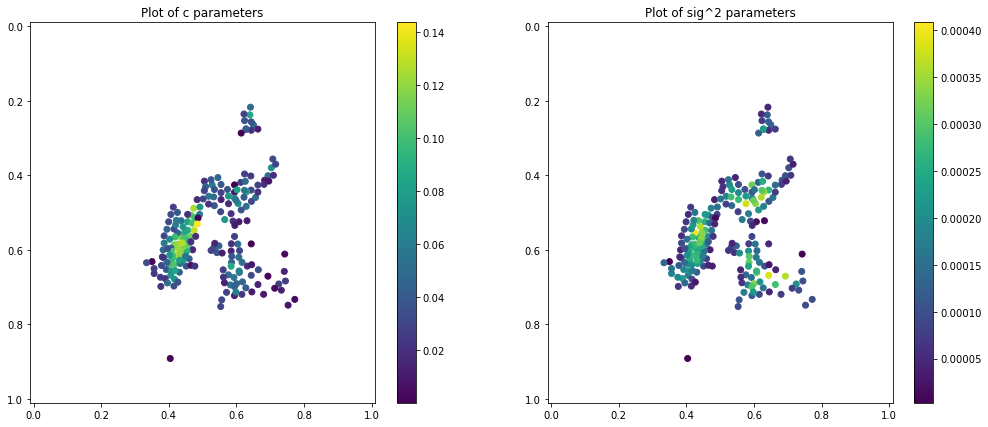

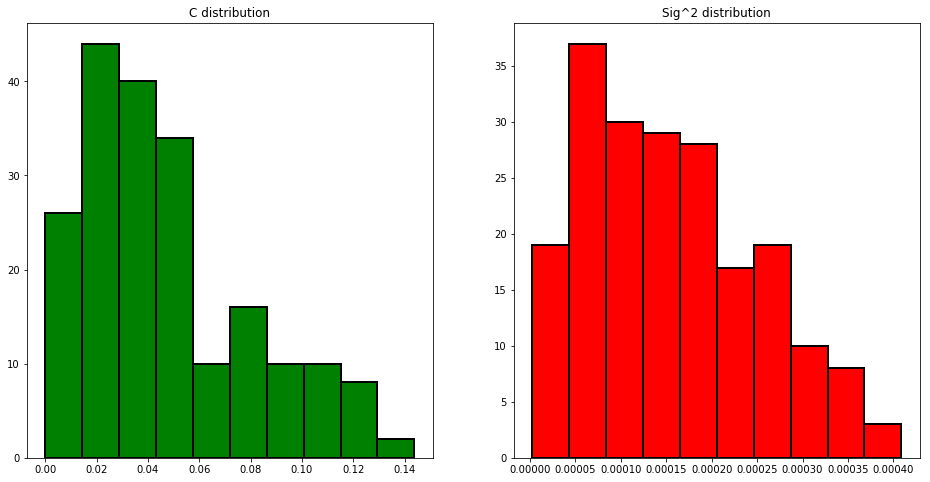

##########################################################################################
Processing example with alpha1: 4.0
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 80100.
nfev: 80114

Residual stats:
Residual RMS: 0.005022928325841415
Residual Variance: 2.4621231468847836e-05
Residual Entropy: 6.933026781092488
Added Flux: 1.3603563539278687
Total elapsed time: 203.79766607284546 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.03258200947746589
Mean min distance between collocation and center points: 0.010795366184373057

Homogeneity of solution:
Mean min distance in the (standarized) parameters spac

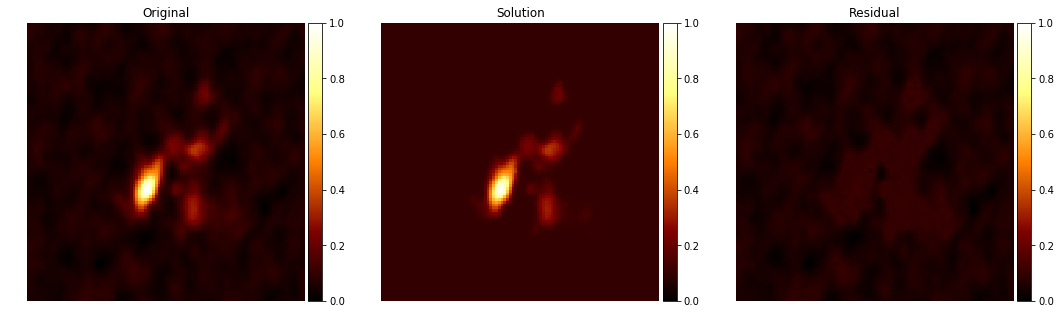

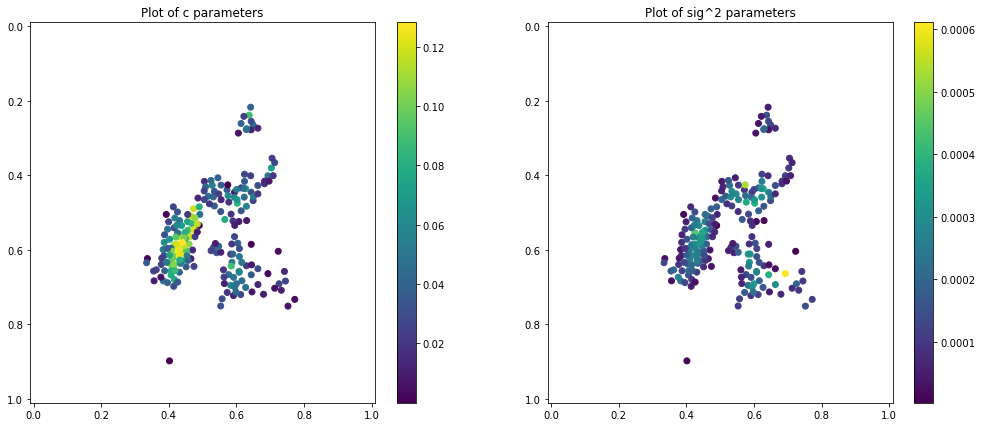

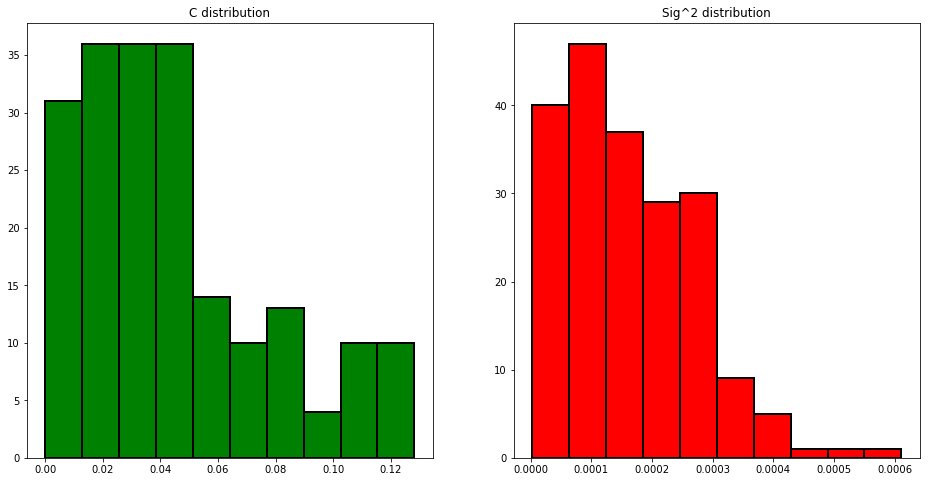

##########################################################################################
Processing example with alpha1: 5.0
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 80100.
nfev: 80115

Residual stats:
Residual RMS: 0.005360663708320982
Residual Variance: 2.8272404196332122e-05
Residual Entropy: 6.76946122370604
Added Flux: 1.4583779274503899
Total elapsed time: 214.22687673568726 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.03224517902110871
Mean min distance between collocation and center points: 0.01059648799710348

Homogeneity of solution:
Mean min distance in the (standarized) parameters space:

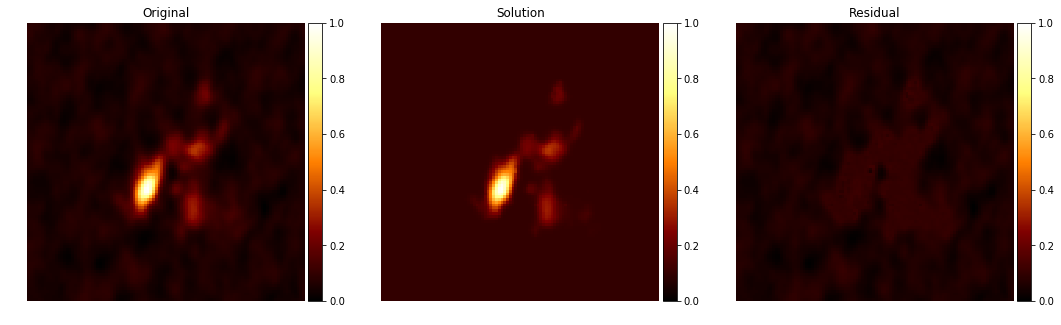

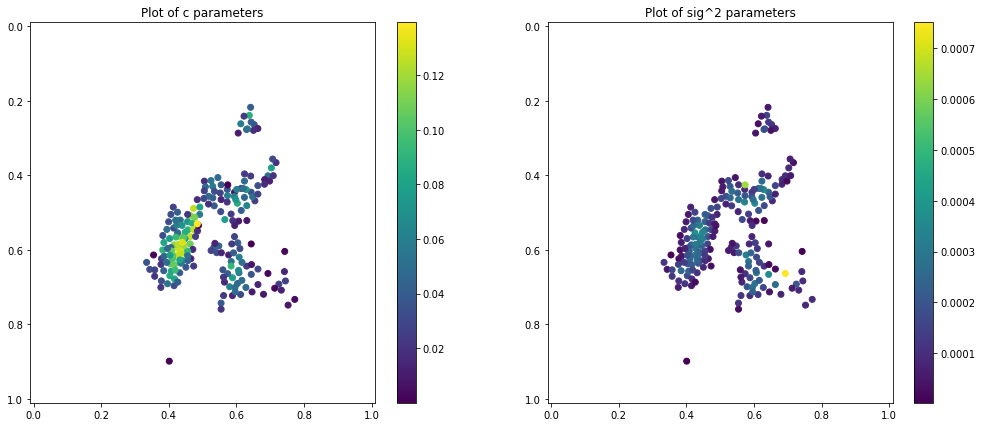

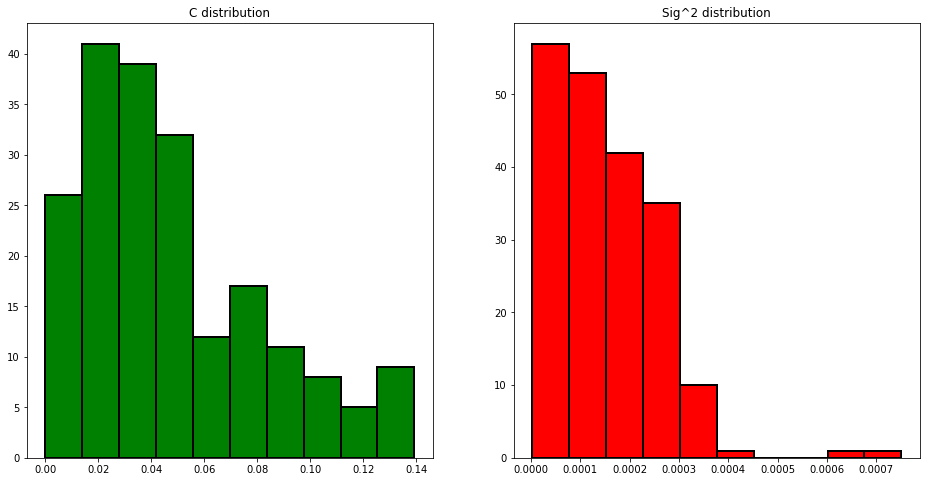

##########################################################################################
Processing example with alpha1: 6.0
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 80100.
nfev: 80111

Residual stats:
Residual RMS: 0.00528400141440535
Residual Variance: 2.7371943455940928e-05
Residual Entropy: 6.818312861564491
Added Flux: 1.432732570748902
Total elapsed time: 198.39223670959473 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.03177721466481329
Mean min distance between collocation and center points: 0.01053116334453015

Homogeneity of solution:
Mean min distance in the (standarized) parameters space: 

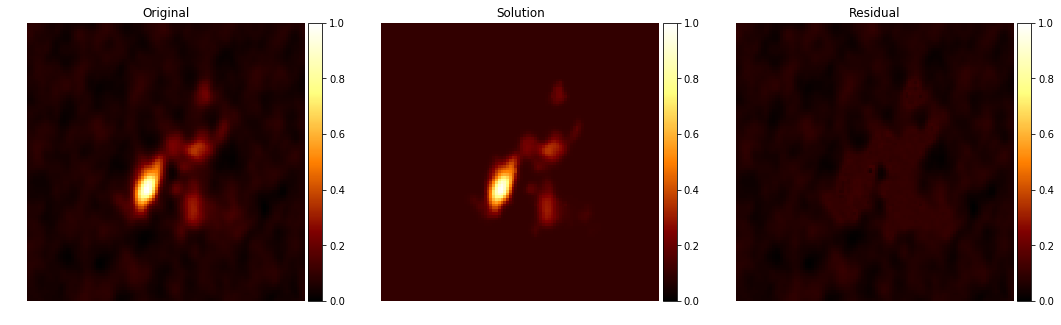

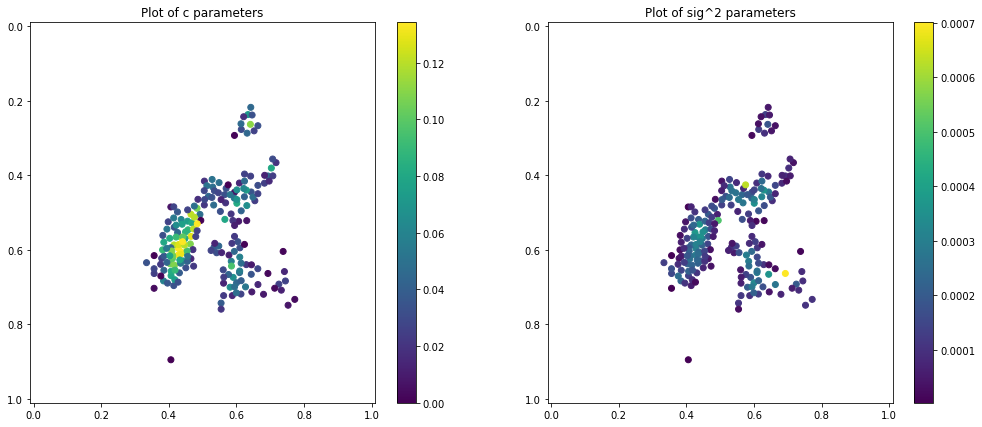

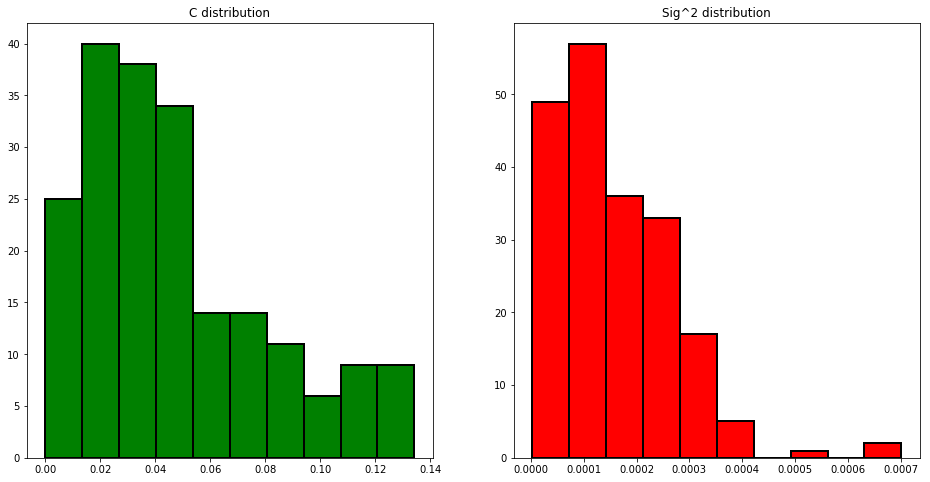

##########################################################################################
Processing example with alpha1: 7.0
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 80100.
nfev: 80111

Residual stats:
Residual RMS: 0.00535555278002431
Residual Variance: 2.815929149058956e-05
Residual Entropy: 6.744704053064291
Added Flux: 1.4360170454822494
Total elapsed time: 201.15587878227234 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.03477224987095584
Mean min distance between collocation and center points: 0.010610834940386159

Homogeneity of solution:
Mean min distance in the (standarized) parameters space:

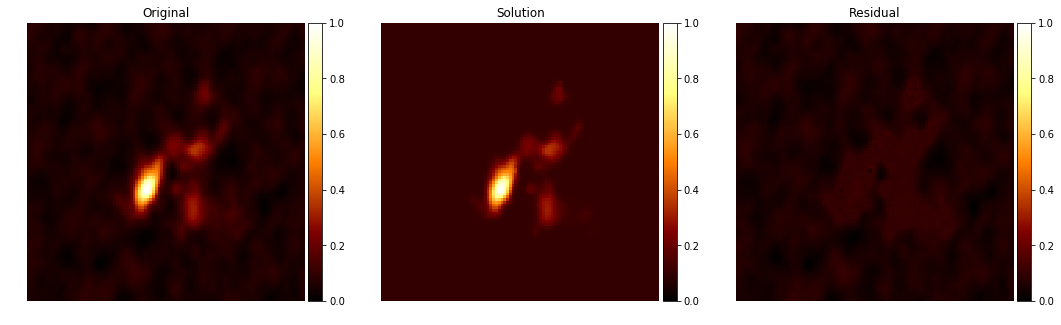

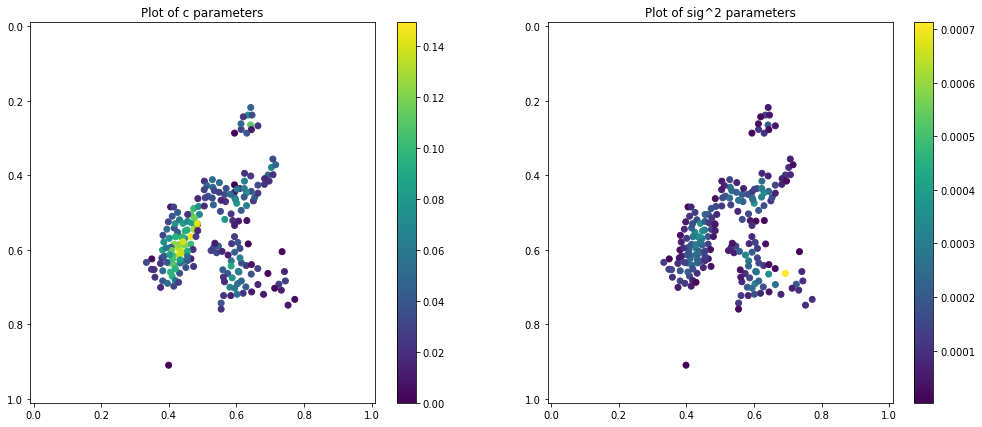

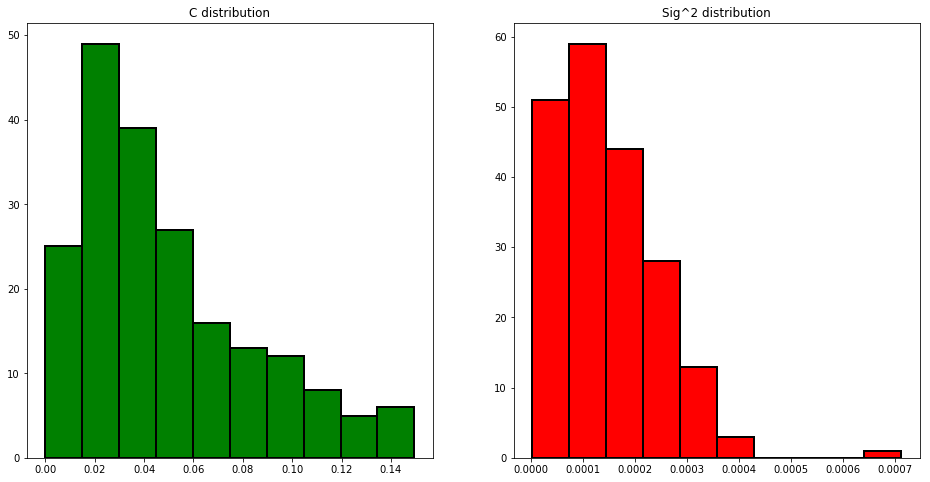

##########################################################################################
Processing example with alpha1: 8.0
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 80100.
nfev: 80109

Residual stats:
Residual RMS: 0.00522485340815856
Residual Variance: 2.6556262835027663e-05
Residual Entropy: 6.907494911795661
Added Flux: 1.351869937373729
Total elapsed time: 157.91963005065918 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.03349717620618859
Mean min distance between collocation and center points: 0.010568783922253086

Homogeneity of solution:
Mean min distance in the (standarized) parameters space:

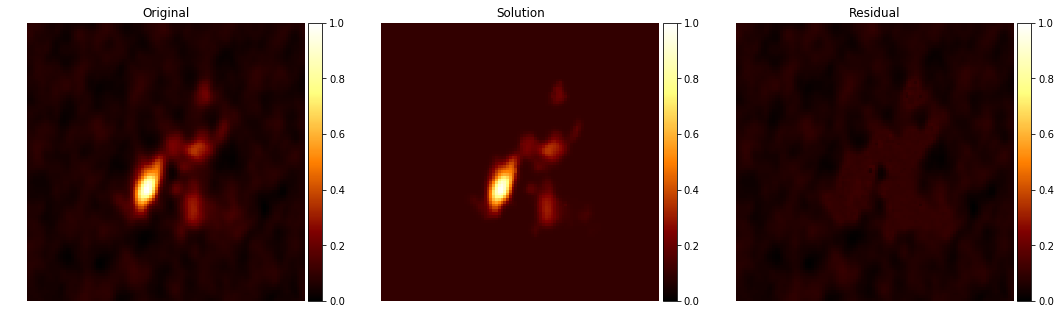

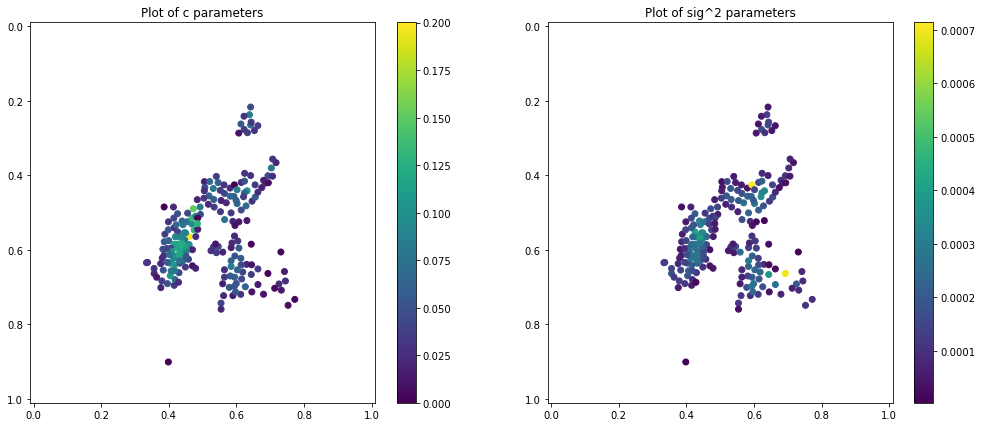

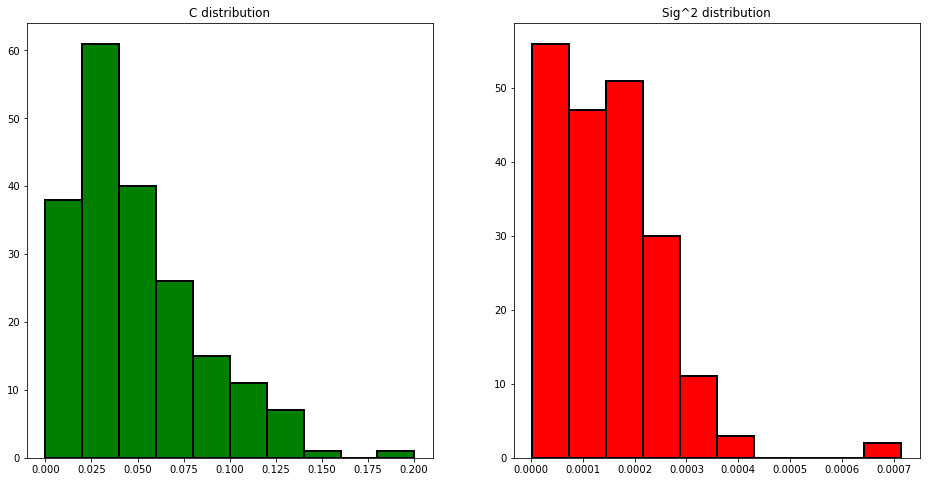

##########################################################################################
Processing example with alpha1: 9.0
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 80100.
nfev: 80108

Residual stats:
Residual RMS: 0.005886029260746264
Residual Variance: 3.410323309743452e-05
Residual Entropy: 6.497319899238169
Added Flux: 1.497278834607055
Total elapsed time: 143.34729599952698 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.032140157247165534
Mean min distance between collocation and center points: 0.010359518368383476

Homogeneity of solution:
Mean min distance in the (standarized) parameters space

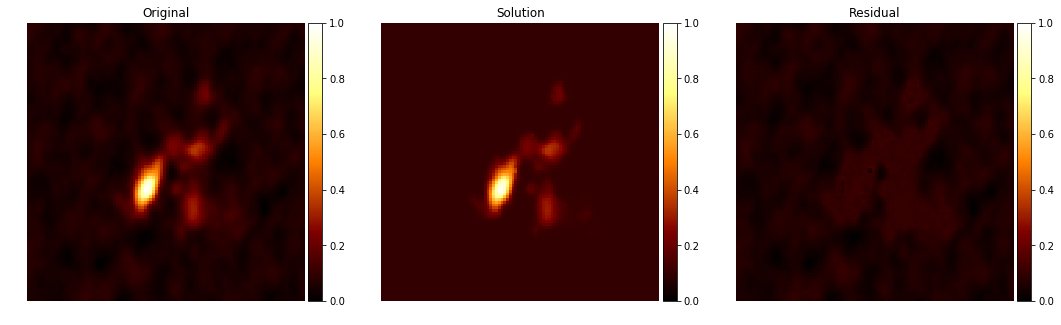

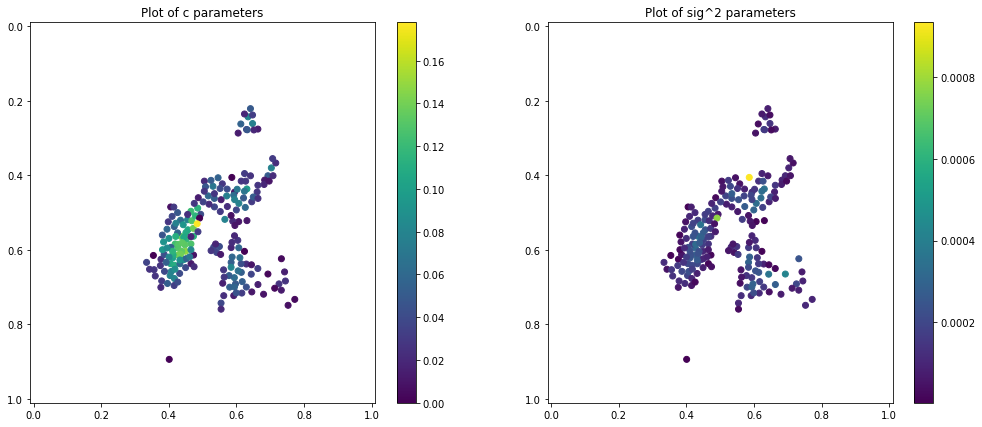

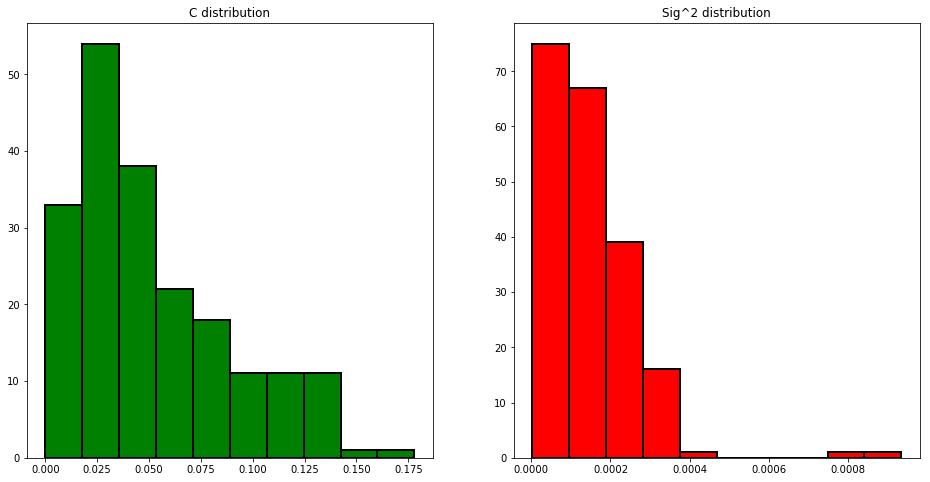

##########################################################################################
Processing example with alpha1: 10.0
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 80100.
nfev: 80112

Residual stats:
Residual RMS: 0.005305214445534291
Residual Variance: 2.6900157431980118e-05
Residual Entropy: 6.882943706897358
Added Flux: 1.2965506637627007
Total elapsed time: 149.4007318019867 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.03255095901605428
Mean min distance between collocation and center points: 0.010678511329170807

Homogeneity of solution:
Mean min distance in the (standarized) parameters spac

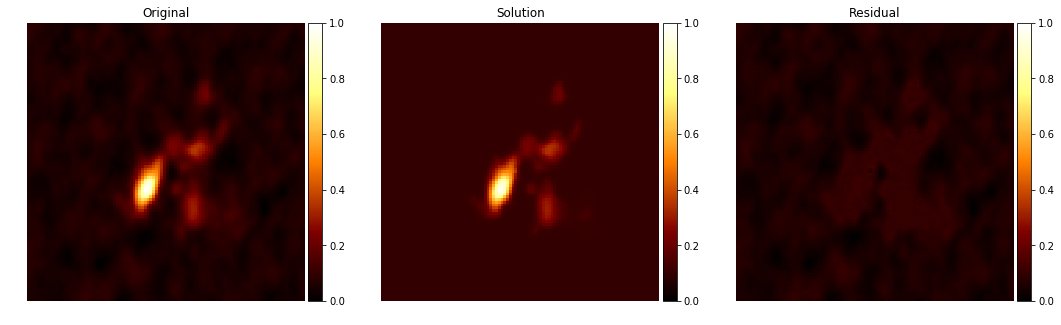

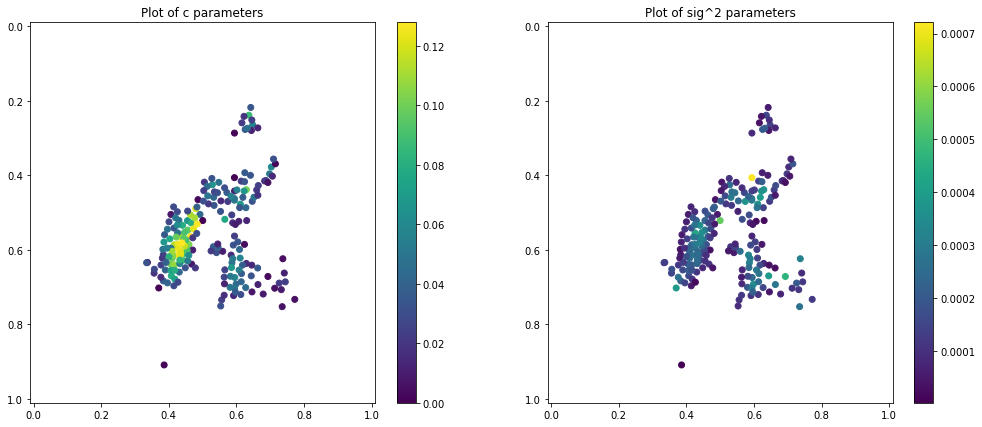

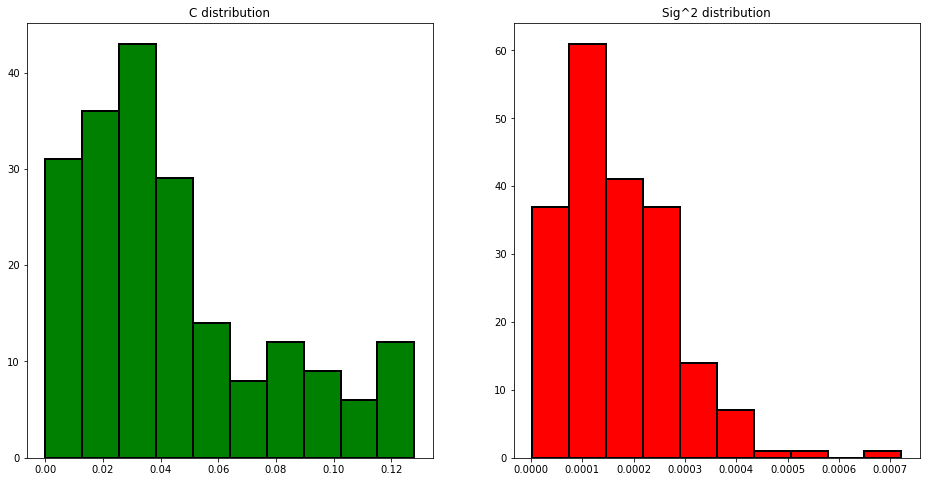

In [5]:
for elm in elm_list:
    print('#'*90)
    print('Processing example with alpha1: {0}'.format(elm.a))
    print('#'*90 + '\n')
    nfev = 100*(len(elm.get_params())+1)
    elm_solver(elm, method='standard', max_nfev=nfev)

In [6]:
alphas = [elm.a for elm in elm_list]
r_stats = [elm.get_residual_stats() for elm in elm_list]
variance = [var for (var,_,_,_) in r_stats]
entropy = [entr for (_,entr,_,_) in r_stats]
rms = [rms for (_,_,rms,_) in r_stats]
flux = [flux for (_,_,_,flux) in r_stats]

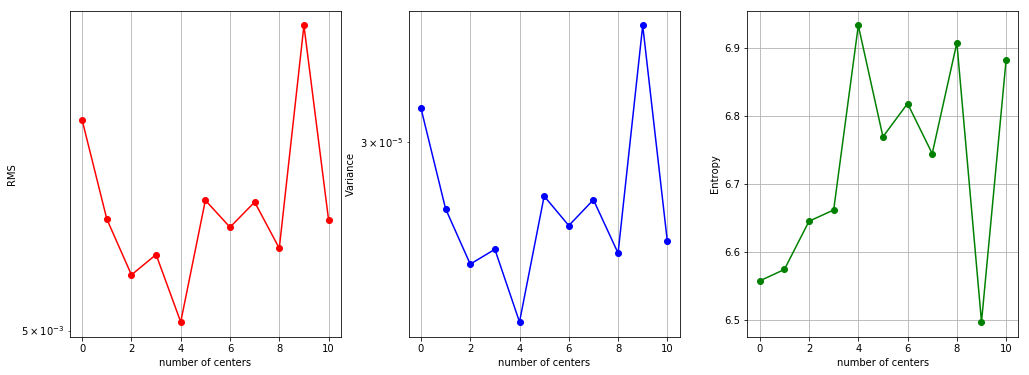

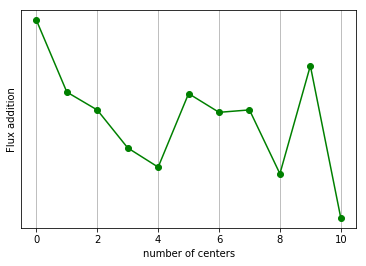

In [8]:
fig = plt.figure(figsize=(17,6))
fig.subplots_adjust(wspace=0.25)
plt.subplot(1,3,1)
plt.semilogy(alphas, rms, 'ro-')
#plt.title('RMS')
plt.grid()
plt.xlabel('number of centers')
plt.ylabel('RMS')

ax = plt.subplot(1,3,2)
plt.semilogy(alphas, variance, 'bo-')
#plt.title('Entropy')
plt.grid()
plt.xlabel('number of centers')
plt.ylabel('Variance')
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))

plt.subplot(1,3,3)
plt.plot(alphas, entropy, 'go-')
#plt.title('Entropy')
plt.grid()
plt.xlabel('number of centers')
plt.ylabel('Entropy')

plt.show()


plt.semilogy(alphas, flux, 'go-')
#plt.title('Entropy')
plt.grid()
plt.xlabel('number of centers')
plt.ylabel('Flux addition')
plt.show()

## `Case 4 `:   $\alpha_1 = 1$ and $\alpha_2 =1e-4$


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: True
status: 2
message: The relative error between two consecutive iterates is at most 0.000000
nfev: 7217

Residual stats:
Residual RMS: 0.20064046626582063
Residual Variance: 0.014395083149585293
Residual Entropy: 6.929528596304131
Total elapsed time: 3644.748876094818 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.02661033443376027
Mean min distance between collocation and center points: 0.00799379974084039

Homogeneity of solution:
Mean min distance in the (standarized) parameters space: 0.04973022530983419
Max min distance in the (standarized) parameters space: 0.42922643022077195


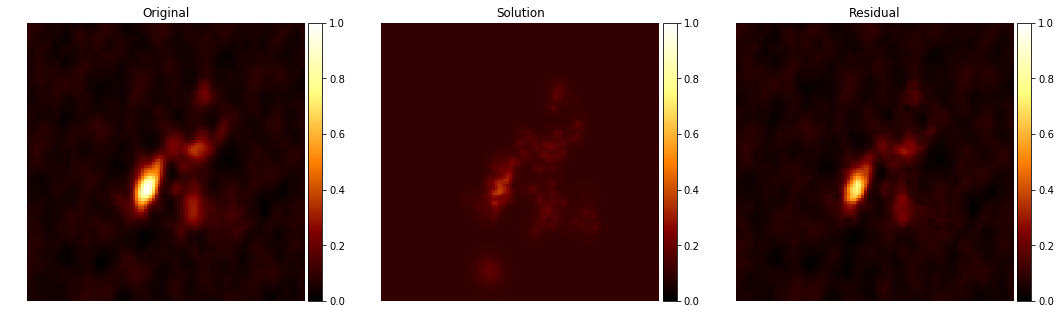

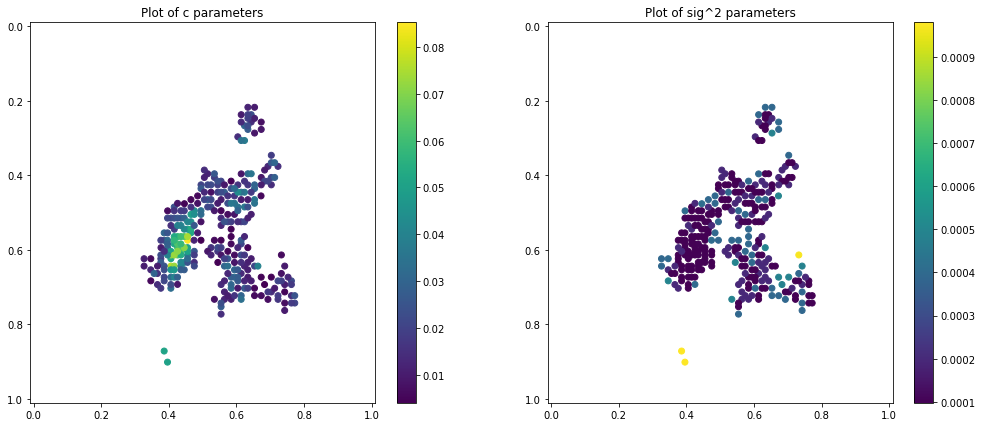

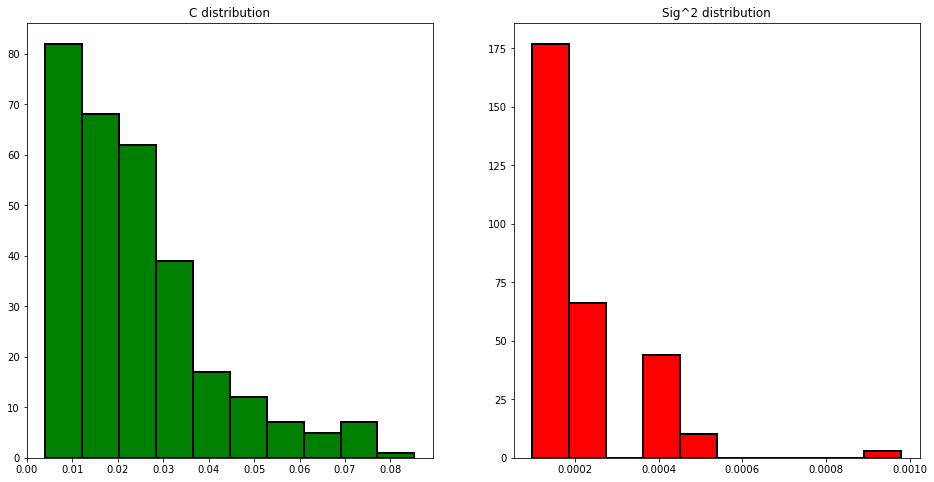

In [22]:
# common parameters
minsig = ( 0.5*(1./data.shape[0] + 1./data.shape[1]) ) / 6.
maxsig = 30*minsig

# number of points of each type
Nb = 75
Nc = 300
Ne = 4*Nc-Nb

# points generation
center_points = random_centers_generation(data, Nc, base_level=base_level, power=2.)
collocation_points = qrandom_centers_generation(dfunc, Ne, base_level, ndim=2)
boundary_points = boundary_generation(Nb)

# right format
xc = center_points[:,0]
yc = center_points[:,1]
xe = collocation_points[:,0]
ye = collocation_points[:,1]
xb = boundary_points[:,0]
yb = boundary_points[:,1]

## visualizing the choosen points
#points_plot(data, center_points=center_points, title="Center Points")
#points_plot(data, center_points=collocation_points, title="Collocation Points")


####################################
# Initial parameters estimation
####################################
#c0, sig0 = estimate_initial_guess(center_points, f, R=0.009, method='mean_dist')
c0, sig0 = estimate_initial_guess(center_points, dfunc, minsig=minsig, maxsig=maxsig, method='min_dist')
#c0, sig0 = _estimate_initial_guess(dfunc, data, center_points, base_level)


#solution_plot(dfunc, c0, sig0, xc, yc, dims=data.shape, base_level=base_level)
#params_plot(c0, sig0, xc, yc)
#params_distribution_plot(c0, sig0)
elm04 = ELModel(data, dfunc, data.shape, xe, ye, xc, yc, xb, yb, c0, sig0, a=1., lamb1=1., b=1e-3, lamb2=1.,
                d1psi1=d1psi, d1psi2=d1psi, d2psi2=d2psi, base_level=base_level, pix_freedom=1.)

nfev = 100*(len(elm04.get_params())+1)
elm_solver(elm04, method='standard', max_nfev=nfev)